In [1]:
# All the neccessary imports

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

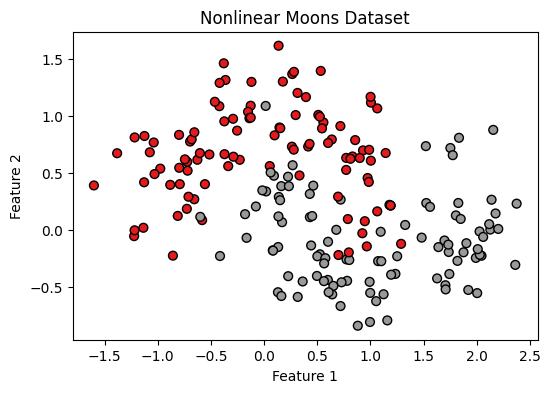

In [2]:
# Generate a nonlinear dataset (moons)
X, y = make_moons(n_samples=200, noise=0.25, random_state=42)

# Visualize the dataset
plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.title('Nonlinear Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [3]:
from sklearn.model_selection import train_test_split

# Split the data: 75% train, 25% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, shuffle=True
)

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")


Training samples: 150
Test samples: 50


In [4]:
# Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on train, transform train
X_test_scaled = scaler.transform(X_test)        # Transform test using train stats

print('X_train_scaled shape:', X_train_scaled.shape)
print('X_test_scaled shape:', X_test_scaled.shape)

X_train_scaled shape: (150, 2)
X_test_scaled shape: (50, 2)


In [5]:
# Train SVM with linear kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train_scaled, y_train)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train_scaled, y_train)


SVC(C=1)

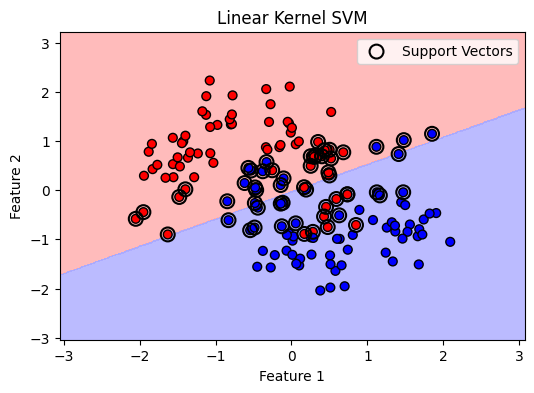

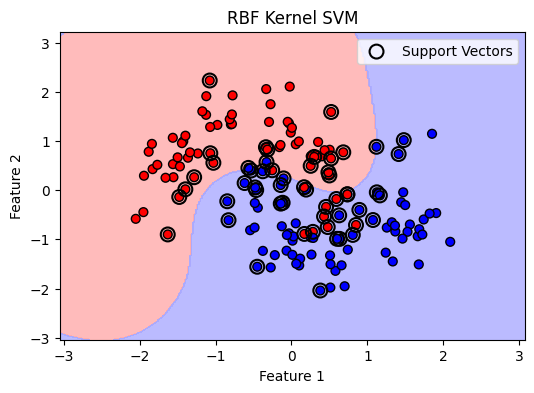

In [6]:
# Helper function to plot decision boundary and margins
from matplotlib.colors import ListedColormap

def plot_svm_decision_boundary(clf, X, y, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(6,4))
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolor='k', s=40)
    # Plot support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Plot for Linear SVM
plot_svm_decision_boundary(svm_linear, X_train_scaled, y_train, 'Linear Kernel SVM')

# Plot for RBF SVM
plot_svm_decision_boundary(svm_rbf, X_train_scaled, y_train, 'RBF Kernel SVM')
